In [14]:
import json
import piton.datasets
import collections


PATH_TO_PITON_DB= '/local-scratch/nigam/projects/ethanid/som-rit-phi-starr-prod.starr_omop_cdm5_deid_2022_09_05_extract2'

data = piton.datasets.PatientDatabase(PATH_TO_PITON_DB)

d = data.get_code_dictionary()

import pickle

labels = pickle.load(open('/local-scratch/nigam/projects/ethanid/piton_labeling/tutorials/survival_tmp/subset_labels/pancreatic_cancer.pickle', 'rb'))


In [17]:
# This should never happen 2489.44 77892 2582.44 92.9993 2679.42


pid = 49855

print(labels[pid])

[Label(time=datetime.datetime(2022, 4, 18, 12, 42), value=SurvivalValue(event_time=datetime.datetime(2022, 7, 28, 23, 59), is_censored=True))]


In [18]:
p = data[pid]
p

Patient(patient_id=49855, events=(Event(start=1958-08-26 00:00:00, code=289), Event(start=1958-08-26 23:59:00, code=542), Event(start=1958-08-26 23:59:00, code=452), Event(start=1958-08-26 23:59:00, code=392), Event(start=2017-07-08 12:23:00, code=7514), Event(start=2017-07-08 12:44:00, code=1, value=110.0), Event(start=2017-07-08 12:44:00, code=42, value=1.9199999570846558), Event(start=2017-07-08 12:44:00, code=2, value=77.0), Event(start=2017-07-08 12:44:00, code=5, value=36.599998474121094), Event(start=2017-07-08 12:44:00, code=5, value=97.80000305175781), Event(start=2017-07-08 12:44:00, code=4, value=16.0), Event(start=2017-07-08 12:44:00, code=51, value=1.0), Event(start=2017-07-08 12:44:00, code=20, value=2772.5), Event(start=2017-07-08 12:44:00, code=0, value=74.0), Event(start=2017-07-08 12:44:00, code=6, value=88.0), Event(start=2017-07-08 12:44:00, code=45, value=66.53500366210938), Event(start=2017-07-08 12:44:00, code=23, value=0.0), Event(start=2017-07-08 12:44:00, code

In [19]:
import datetime

def get_age(t):
    return (t - datetime.datetime.combine(p.events[0].start, datetime.time.min) )/ datetime.timedelta(days=1)

print([get_age(l.time) for l in labels[pid]])

[23246.529166666667]


In [22]:
for event in p.events:
    print(get_age(event.start), event, bytes(d[event.code]).decode('utf8'))

0.0 Event(start=1958-08-26 00:00:00, code=289) SNOMED/3950001
0.9993055555555556 Event(start=1958-08-26 23:59:00, code=542) Race/5
0.9993055555555556 Event(start=1958-08-26 23:59:00, code=452) Gender/F
0.9993055555555556 Event(start=1958-08-26 23:59:00, code=392) Ethnicity/Not Hispanic
21501.515972222223 Event(start=2017-07-08 12:23:00, code=7514) SNOMED/396331005
21501.530555555557 Event(start=2017-07-08 12:44:00, code=1, value=110.0) LOINC/8480-6
21501.530555555557 Event(start=2017-07-08 12:44:00, code=42, value=1.9199999570846558) LOINC/8277-6
21501.530555555557 Event(start=2017-07-08 12:44:00, code=2, value=77.0) LOINC/8462-4
21501.530555555557 Event(start=2017-07-08 12:44:00, code=5, value=36.599998474121094) LOINC/8310-5
21501.530555555557 Event(start=2017-07-08 12:44:00, code=5, value=97.80000305175781) LOINC/8310-5
21501.530555555557 Event(start=2017-07-08 12:44:00, code=4, value=16.0) LOINC/9279-1
21501.530555555557 Event(start=2017-07-08 12:44:00, code=51, value=1.0) LOINC/83

In [2]:
dictionary = json.load(open("/local-scratch/nigam/projects/ethanid/piton/native/results/dict_entries"))

In [5]:
for name, dicti in dictionary.items():
    print(name)

    print(len(dicti))

    type_count = collections.defaultdict(int)

    for i, entry in enumerate(dicti[:50_000]):
        type_count[entry['type']] += 1

    print(type_count)

    type_count = collections.defaultdict(int)

    for i, entry in enumerate(dicti):
        type_count[entry['type']] += 1

    print(type_count)

ontology
385009
defaultdict(<class 'int'>, {0: 16166, 2: 19751, 1: 14083})
defaultdict(<class 'int'>, {0: 75343, 2: 237795, 1: 71871})
regular
349715
defaultdict(<class 'int'>, {0: 15313, 2: 20301, 1: 14386})
defaultdict(<class 'int'>, {0: 40049, 2: 237795, 1: 71871})


In [ ]:
total_events = 0



for event in data[0].events:
    if 'STANFORD_OBS' in bytes(d[event.code]).decode('utf8'):
        continue
    
    total_events += 1
    print(event)
    
print(len(data[0].events))
print(total_events)

In [8]:
for name, dicti in dictionary.items():
    codes = {a['code']:i for i, a in enumerate(dicti)}

    for i, entry in enumerate(dicti[:100]):
        # type_count[entry['type']] += 1
        if entry['type'] != 0:
            continue
        c = bytes(d[entry['code']]).decode('utf8')
        if 'SNOMED' not in c:
            continue
        print(c)
        print(entry['weight'], entry['code'], entry['type'], entry['val_start'], entry['val_end'])


SNOMED/138875005
-0.37756210565567017 51747 0 0.0 0.0
SNOMED/71388002
-0.08683542162179947 49325 0 0.0 0.0
SNOMED/404684003
-0.0866445004940033 6849 0 0.0 0.0
SNOMED/250171008
-0.040391478687524796 50918 0 0.0 0.0
SNOMED/118234003
-0.040338028222322464 50674 0 0.0 0.0
SNOMED/64572001
-0.04031822457909584 49701 0 0.0 0.0
SNOMED/108252007
-0.03662176430225372 776 0 0.0 0.0
SNOMED/122869004
-0.02812344953417778 49489 0 0.0 0.0
SNOMED/128927009
-0.02468879520893097 49534 0 0.0 0.0
SNOMED/74040009
-0.02347121760249138 2320 0 0.0 0.0
SNOMED/362958002
-0.020607510581612587 52373 0 0.0 0.0
SNOMED/243796009
-0.019363095983862877 72129 0 0.0 0.0
SNOMED/363679005
-0.016260676085948944 49759 0 0.0 0.0
SNOMED/102957003
-0.015267092734575272 54075 0 0.0 0.0
SNOMED/308335008
-0.015255212783813477 148 0 0.0 0.0
SNOMED/433441002
-0.01503671333193779 50029 0 0.0 0.0
SNOMED/248982007
-0.014915882609784603 49723 0 0.0 0.0
SNOMED/301857004
-0.01434195414185524 50467 0 0.0 0.0
SNOMED/302292003
-0.0141769852

In [ ]:
p = data[3100]

print(data.get_original_patient_id(2))

found_it = 0
total = 0
found_indirect = 0

for event in p.events:
    if event.value is not None:
        continue
    text = bytes(d[event.code]).decode('utf8')
    total += 1
    if codes[event.code] < 50000:
        found_it += 1
    found_indirectly = False
    # for parent in data.get_ontology().get_all_parents(event.code):
    #     if parent not in codes or codes[parent] > 50000:
    #             continue
    #     found_indirectly = True
    found_indirect += found_indirectly
    
    if codes[event.code] >= 50000 and not found_indirectly:
        print("Lost", event, text, codes[event.code])
    else:
        print("Found", event, text, codes[event.code])
    
    # if text == "SNOMED/21719001":
    #     for parent in data.get_ontology().get_all_parents(event.code):
    #         if parent not in codes or codes[parent] > 50000:
    #             continue
    #         print(bytes(d[parent]).decode('utf8'), codes[parent])
    #     print(event, codes[event.code], text)
    
print(found_it)
print(found_indirect)
print(total)

In [26]:
import numpy as np
import matplotlib.pyplot as plt

blah = np.array(json.load(open("/local-scratch/nigam/projects/ethanid/piton/native/results/shoot")))


In [30]:
print(blah.mean(axis=0))

[13705.5         1566.13300744   800.05607033   527.80793083
 27774.73325551   104.09295199]


In [47]:
print((blah < 10000).mean(axis=0))

[0.36480374 0.96968481 0.98781556 0.99551291 0.7596673  0.9998176 ]


In [59]:
def weighted_percentile(data, percents, weights=None):
    ''' percents in units of 1%
        weights specifies the frequency (count) of data.
    '''
    if weights is None:
        return np.percentile(data, percents)
    ind=np.argsort(data)
    d=data[ind]
    w=weights[ind]
    p=1.*w.cumsum()/w.sum()*100
    y=np.interp(percents, p, d)
    return y

In [80]:
bins = [[] for i in range(13)]

for row in blah:
    for i in range(13):
        if row[3] <= (1 << i):
            bins[i].append(row)
            break
    else:
        bins[-1].append(row)

(array([1.416e+03, 5.100e+01, 5.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  115. ,  2954.1,  5793.2,  8632.3, 11471.4, 14310.5, 17149.6,
        19988.7, 22827.8, 25666.9, 28506. ]),
 <BarContainer object of 10 artists>)

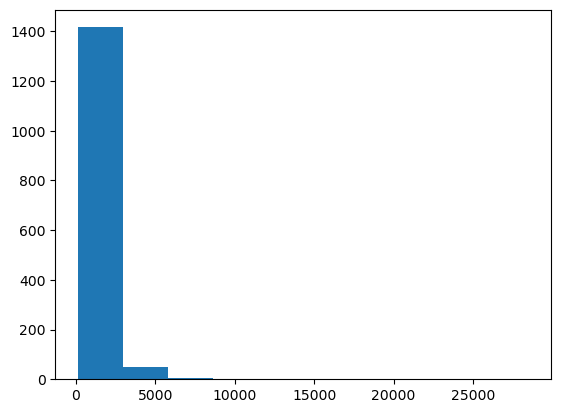

In [94]:
plt.hist(np.array(bins[12])[:, -1])

In [82]:
print([len(b) for b in bins])

[0, 11, 269, 1317, 1996, 2474, 3852, 4037, 3944, 3676, 2687, 1672, 1477]
